## IRIS CLASSIFICATION BY USING NEURAL NETWORKS


 problem statement -  
 Iris flower has 3 species: Setosa, Versicolor and Virginica, which differs according to their measurements
 Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a neural network that can learn from the measurements of the iris species and classify them.






INPUT:
Sepal Length
Sepal width
Petal length
Petal width  

OUTPUT:
Class of Flower

In [50]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=850)

In [51]:
#importing all neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import seaborn as sns

In [52]:
iris = pd.read_csv("/content/IRIS.csv")  #loading dataset
print(type(iris))  #type of dataset
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


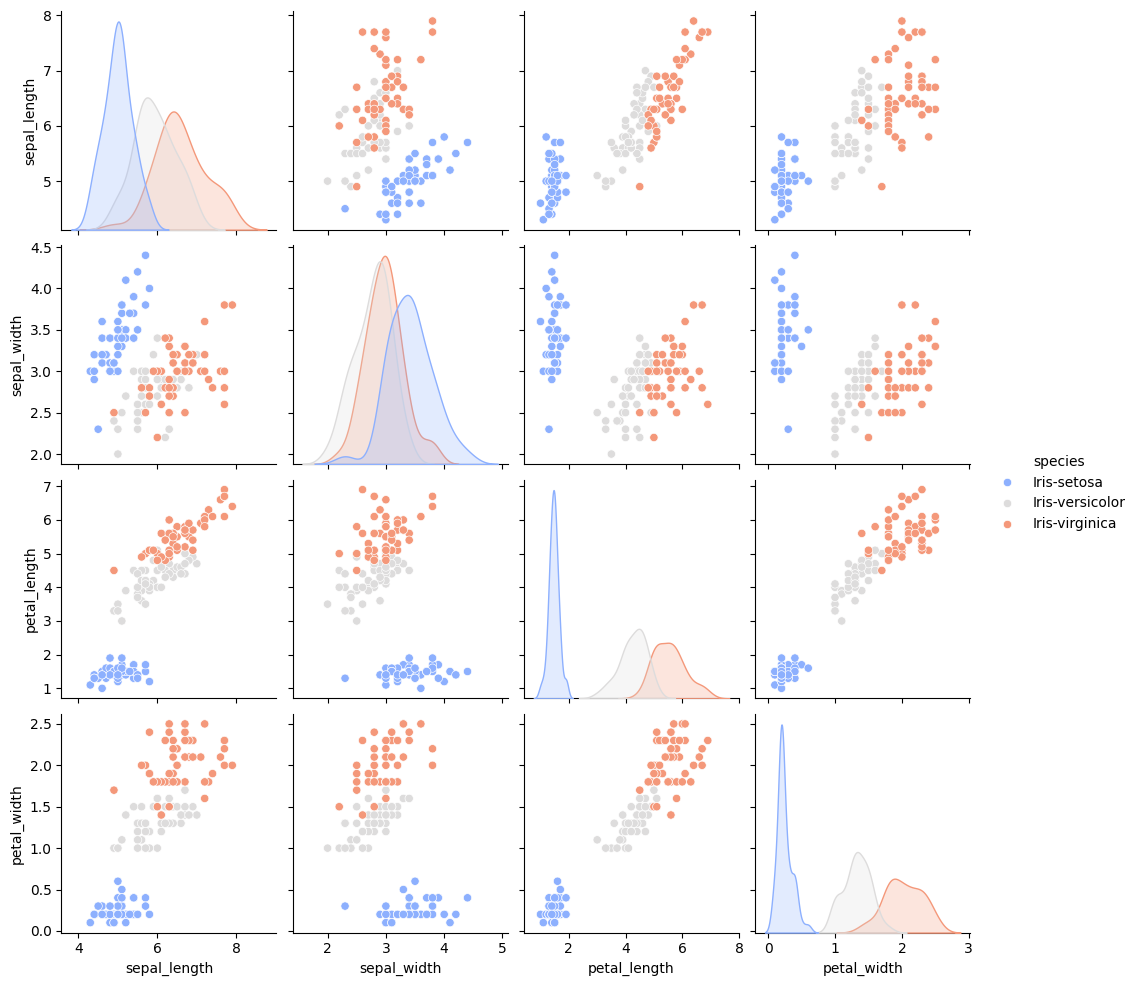

In [49]:
sns.pairplot(iris[['sepal_length','sepal_width','petal_length','petal_width','species']], hue="species", diag_kind='kde', palette="coolwarm")

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

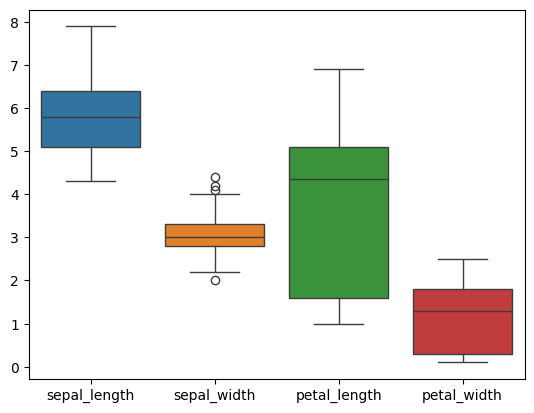

In [9]:
sns.boxplot(iris)

In [55]:
q1, q3 = np.percentile(iris['sepal_width'], [25, 75])  # Identify the quartiles
iqr = q3 - q1    # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)   # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['sepal_width'] >= lower_bound) & (iris['sepal_width'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['sepal_length'], [25, 75])  # Identify the quartiles

iqr = q3 - q1  # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['sepal_length'] >= lower_bound) & (iris['sepal_length'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['petal_length'], [25, 75])  # Identify the quartiles

iqr = q3 - q1  # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['petal_length'] >= lower_bound) & (iris['petal_length'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['petal_width'], [25, 75])  # Identify the quartiles

iqr = q3 - q1   # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['petal_width'] >= lower_bound) & (iris['petal_width'] <= upper_bound)]  # Drop the outliers


In [56]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pandas as pd
encoder = LabelEncoder()  # Create a LabelEncoder object
clean_data['species'] = encoder.fit_transform(clean_data['species'])  # Encode the 'species' column
scaler = MinMaxScaler()  # Normalize the data
normalized_data = scaler.fit_transform(clean_data)
normalized_df = pd.DataFrame(normalized_data, columns=clean_data.columns)  # Convert the normalized data back to a DataFrame
standard_scaler = StandardScaler()  # Standardize the data
standardized_data = standard_scaler.fit_transform(normalized_df)
standardized_df = pd.DataFrame(standardized_data, columns=clean_data.columns)  # Convert the standardized data back to a DataFrame
print("Original DataFrame:")
print(clean_data.head())
print("\nNormalized DataFrame:")
print(normalized_df.head())
print("\nStandardized DataFrame:")
print(standardized_df.head())

Original DataFrame:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Normalized DataFrame:
   sepal_length  sepal_width  petal_length  petal_width  species
0      0.222222     0.625000      0.067797     0.041667      0.0
1      0.166667     0.416667      0.067797     0.041667      0.0
2      0.111111     0.500000      0.050847     0.041667      0.0
3      0.083333     0.458333      0.084746     0.041667      0.0
4      0.194444     0.666667      0.067797     0.041667      0.0

Standardized DataFrame:
   sepal_length  sepal_width  petal_length  petal_width   species
0     -0.900681     1.032057     -1.341272    -1.312977 -1.224745
1     -1.143017    -

In [57]:
X = clean_data.drop(columns =['species'])
Y = clean_data.species
print(X.shape)
print(X)
print(Y.shape)
print(Y)


(150, 4)
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
(150,)
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X.shape)
print(X_train.shape)
print(Y.shape)
print(y_train.shape)


(150, 4)
(105, 4)
(150,)
(105,)


In [63]:

# Define the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)

# Evaluate the model
test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 4.2109 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 4.0700 - accuracy: 0.3524
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 3.9427 - accuracy: 0.3524
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 3.8194 - accuracy: 0.3429
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 3.7184 - accuracy: 0.3429
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 3.6076 - accuracy: 0.3429
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 3.5121 - accuracy: 0.3429
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 3.4096 - accuracy: 0.3429
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 3.2911 - accuracy: 0.3429
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 3.1759 - accuracy: 0.3429
Epoch 11/100
4/4 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.4151 - accuracy: 0.8000
Test accuracy: [0.4151237905025482, 0.800000011920929]


In [64]:


def predict_iris_species(sq):
    # Take input from the user
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))

    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                               columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    #np.argmax used to find the index of the maximum value in the array
    predict = sq.predict(input_data)
    prediction=np.argmax(predict)
    # Make the prediction
    #prediction = sq.predict(input_data)

    # Decode the predicted species
    species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    predicted_species = species_dict[prediction]

    return predicted_species

# Use the function to make a prediction
predicted_species = predict_iris_species(model)
print(f"The predicted species is: {predicted_species}")

Enter sepal length: 3
Enter sepal width: 3
Enter petal length: 3
Enter petal width: 3
1/1 [==============================] - 0s 50ms/step
The predicted species is: virginica
